# Investigating Class Distribution and Sentiment Polarity

## Load Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# impoer libraries
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import pandas as pd

# import data
df = pd.read_csv("/content/drive/MyDrive/thesis/df_cleaned.csv")

In [ ]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [ ]:
df.iloc[329].cleaned_text


'didnt,realis,horror,start,read,although,like,ive,seen,review,would,call,cosi,horror,horror,isnt,genr,felt,almost,young,adult,anyth,els,particularli,main,charact,name,vesper,wast'

### Initial Distribution of Star Rating

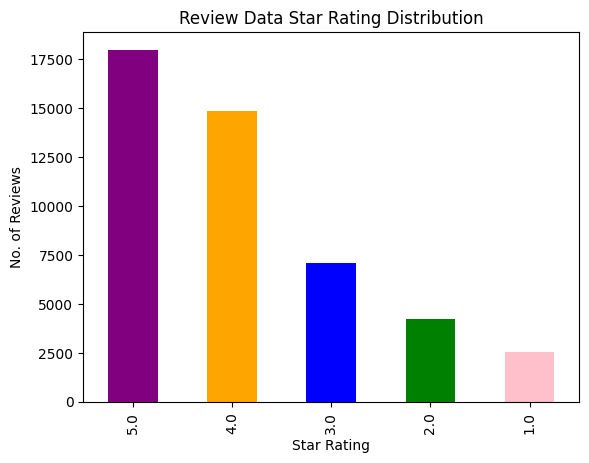

In [ ]:
# Define colors
colors = ['purple', 'orange', 'blue', 'green', 'pink']

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['star_rating']).plot.bar(title="Review Data Star Rating Distribution", color=colors)
plt.xlabel("Star Rating")
plt.ylabel("No. of Reviews")
plt.show()


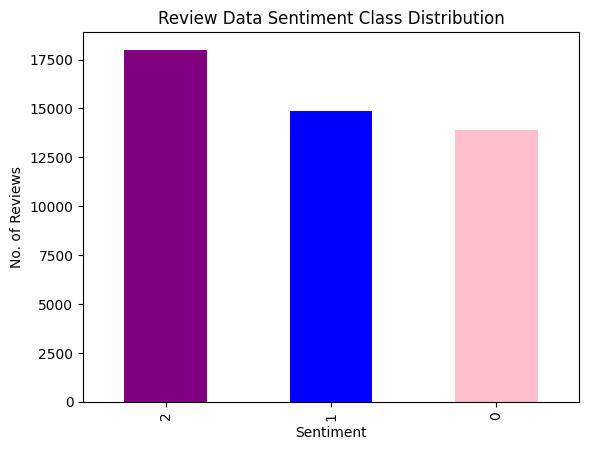

In [ ]:
# Define colors
colors = ['purple', 'blue', 'pink']

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Review Data Sentiment Class Distribution", color=colors)
plt.xlabel("Sentiment")
plt.ylabel("No. of Reviews")
plt.show()

## TextBlob

In [ ]:
from textblob import TextBlob

In [ ]:
df['polarity']=df['review_text'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['subjectivity']=df['review_text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [ ]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text,polarity,subjectivity
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo...",0.221250,0.650000
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e...",0.156923,0.579231
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do...",0.196094,0.587500
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar",-0.071429,0.214286
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba...",0.000000,0.000000


### Polarity Score

In [ ]:
# Print 3 random reviews with the highest polarity score
print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['review_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Polarity:
Review 1:
 sooo good!!
Review 2:
 Drake’s poetry in this collection is breathtaking.
Review 3:
 you know what jennette? i’m also glad your mom died!!!!


In [ ]:
# Print 3 random reviews with the lowest polarity score
print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['review_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 FUCK!!!!!
Review 2:
 henry is so boring why did alex keep sucking his dick
Review 3:
 gild is so boring yawning_face 


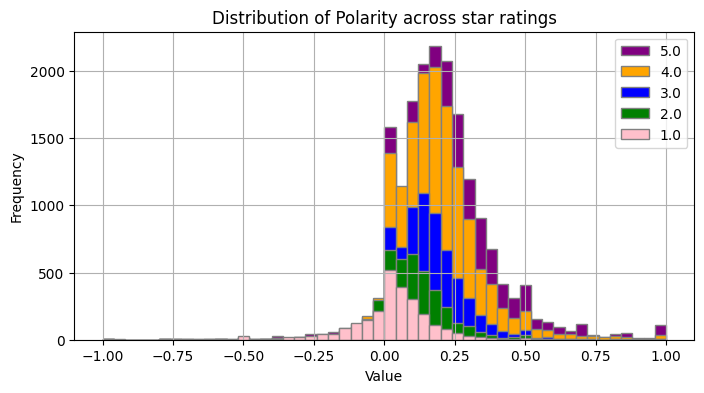

In [ ]:
# Get group names and define colors
group_name = sorted(df['star_rating'].unique(), reverse= True)
colors = ['purple', 'orange','blue','green','pink']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = df[df['star_rating']==group]['polarity'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=50,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Polarity across star ratings')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

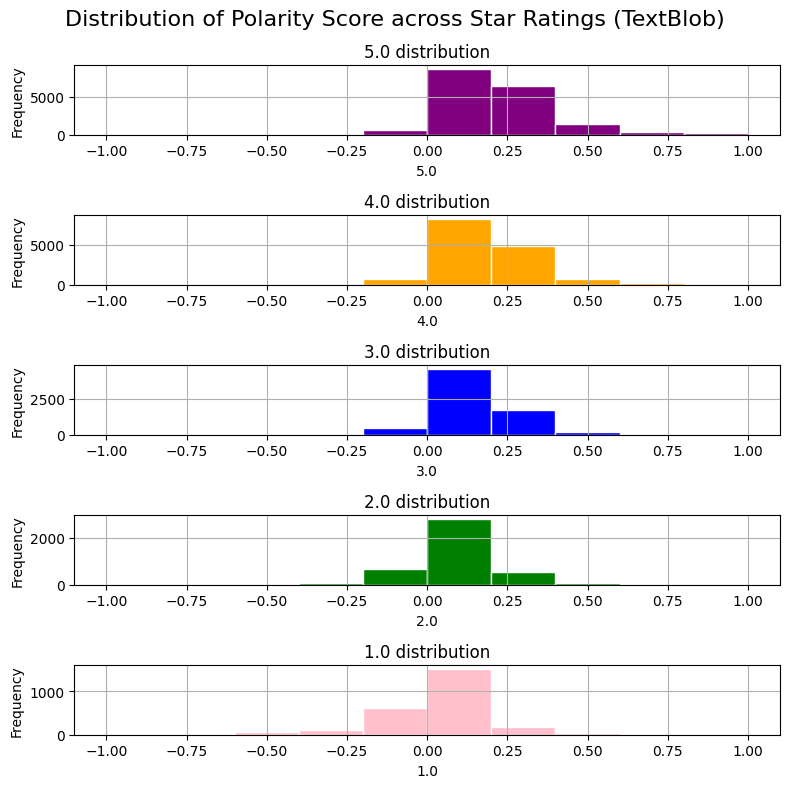

In [ ]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, group in enumerate(group_name):

    # Add the histogram
    ax =df[df['star_rating']==group]['polarity'].hist(ax=axes[i],
                    edgecolor='white', # Color of the border
                    color=colors[i] # Color of the bins
                   )

    # Add title and axis label
    axes[i].set_title(f'{group} distribution')
    axes[i].set_xlabel(group)
    axes[i].set_ylabel('Frequency')

# Add a general title to the plot
fig.suptitle('Distribution of Polarity Score across Star Ratings (TextBlob)', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


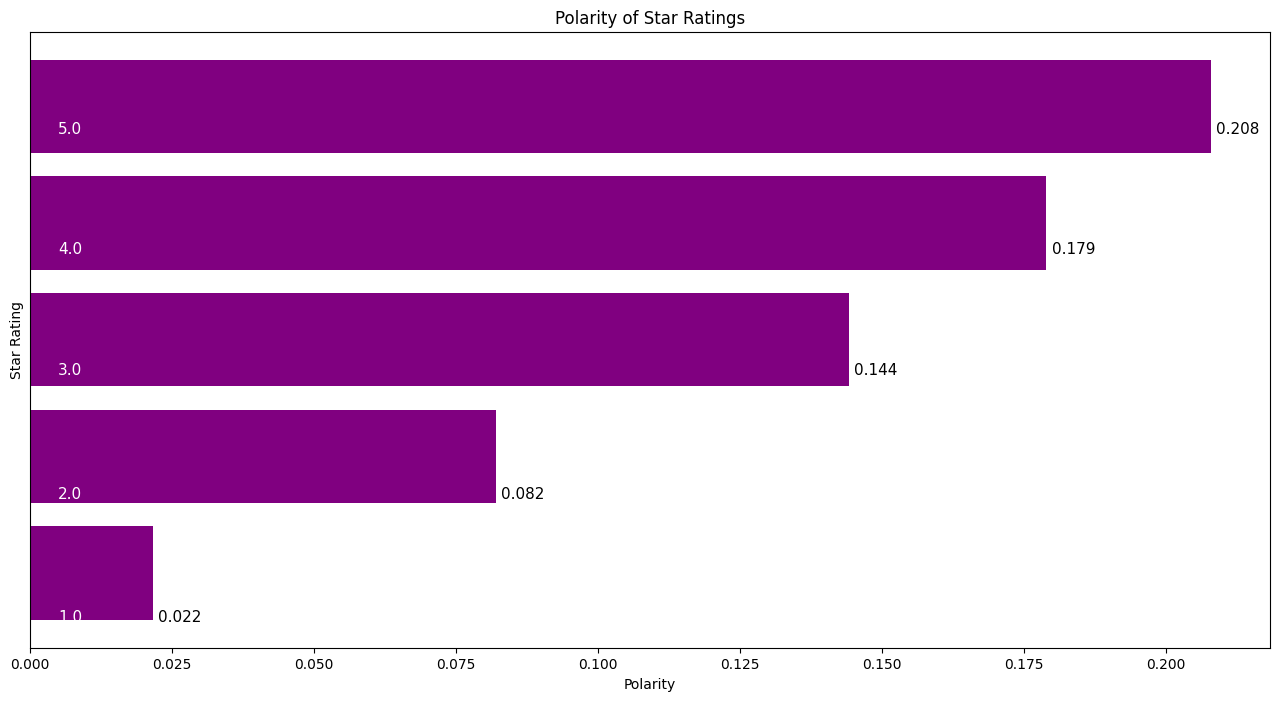

In [ ]:
star_rating_polarity_sorted=pd.DataFrame(df.groupby('star_rating')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Star Rating')
plt.title('Polarity of Star Ratings')
polarity_graph=plt.barh(np.arange(len(star_rating_polarity_sorted.index)),star_rating_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,star_rating_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,star_rating_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

### Subjectivity Score

In [ ]:
# Print 3 random reviews with the highest polarity score
print("3 Random Reviews with Highest Subjectivity:")
for index,review in enumerate(df.iloc[df['subjectivity'].sort_values(ascending=False)[:3].index]['review_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Highest Subjectivity:
Review 1:
 He is not funny ... all his characters are stupid! Let’s not confuse stupid with funny.
Review 2:
 This is fucking adorable.
Review 3:
 ¿TE APASIONAN LAS HISTORIAS DE DIOSES smiling_face_with_heart-eyes ? parrot Es más, añádele a la formula un puñado de aves exóticas, una escuela para formar a los semidioses en héroes y una terrible prueba que exige un sacrificio humano face_screaming_in_fear  parrot  ¿A que suena tentador fire ?Pues espera porque apenas he empezado! parrot Cada diez años se celebran LAS PRUEBAS DEL SOL, donde solo participan los diez semidioses más poderosos, así que este año no podía ser diferente, solo que, para sorpresa de todos, este año eligen también a dos semidioses que no están preparados para enfrentarse a esas pruebas ni mucho menos para todo lo que les espera skull_and_crossbones  parrot Y no solo eso, sino que Jade, uno de nuestros dos candidatos, ve cómo su mundo se tambalea peligrosamente al darse cu

In [ ]:
# Print 3 random reviews with the highest polarity score
print("3 Random Reviews with Lowest Subjectivity:")
for index,review in enumerate(df.iloc[df['subjectivity'].sort_values(ascending=True)[:3].index]['review_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Subjectivity:
Review 1:
 THIS is how you do friends-to-lovers.
Review 2:
 Mokslininkai įrodė, kad gimus vaikui, motinos smegenyse lieka jo DNR. Kam nėra pasitaikę, kad patekus į pavojų, nusiminus ar ką nors iškrėtus, mama žinojo, kas atsitiko? Bloga naujiena, nelaimingas atsitikimas, įskaudinta širdis - kad ir kas nutiktų, lyg tyčia paskambins ar parašys mama. Ėmiau ir pagalvojau apie tave. Ar viskas gerai?Bambukai žydi retai, sykį per 60-100 metų, bet vos pražysta tėvinis augalas, jo atžala - kad ir kur ji pasaulyje būtų - būtinai pražysta drauge. Galbūt motiniška intuicija kiek primena bambuką. Nesvarbu, kur tuo metu esi - tave ir mamą vis tiek sieja ryšys. Tačiau kaip nutiko taip, kad visos Slovakijos motinos, nieko neįtardamos ir nenujausdamos, išleido savo dukras “keletą mėnesių padirbėti valstybės labui avalynės fabrike”? Šabo metu, 999, tiksliau 997, nes naciai patys susipainiojo skaičiuose, slovakės paauglės buvo išvežtos į Aušvicą. Tai buvo pirmasi

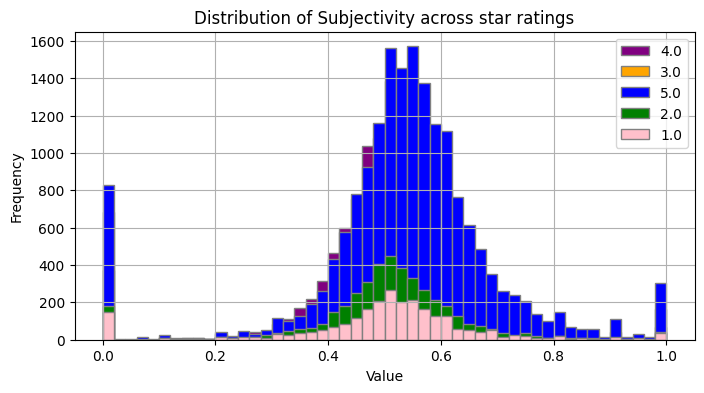

In [ ]:
# Get group names and define colors
group_name = df['star_rating'].unique()
colors = ['purple', 'orange','blue','green','pink']

# Plot the histograms
for i, group in enumerate(group_name):
    ax = df[df['star_rating']==group]['subjectivity'].hist(figsize=(8, 4),
                                        edgecolor='gray',
                                        bins=50,
                                        color=colors[i]
                                       )

# Add a legend
ax.legend(group_name)

# Add a title and axis label
ax.set_title('Distribution of Subjectivity across star ratings')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

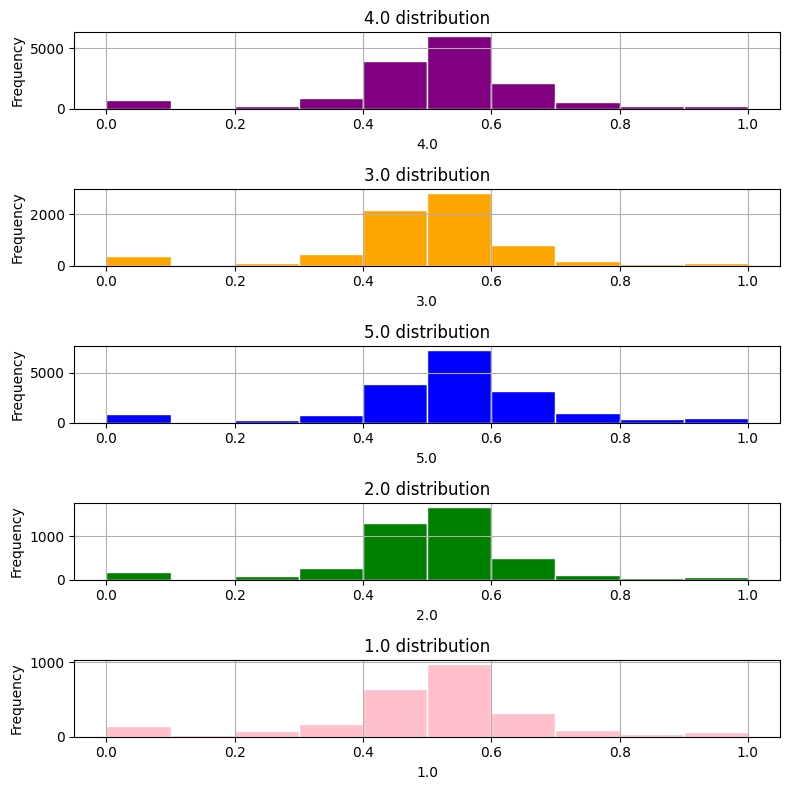

In [ ]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, group in enumerate(group_name):

    # Add the histogram
    ax =df[df['star_rating']==group]['subjectivity'].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color=colors[i] # Color of the bins
                   )

    # Add title and axis label
    axes[i].set_title(f'{group} distribution')
    axes[i].set_xlabel(group)
    axes[i].set_ylabel('Frequency')

#ax.set_title("Distribution of Polarity Score across Star Ratings (TextBlob)")
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


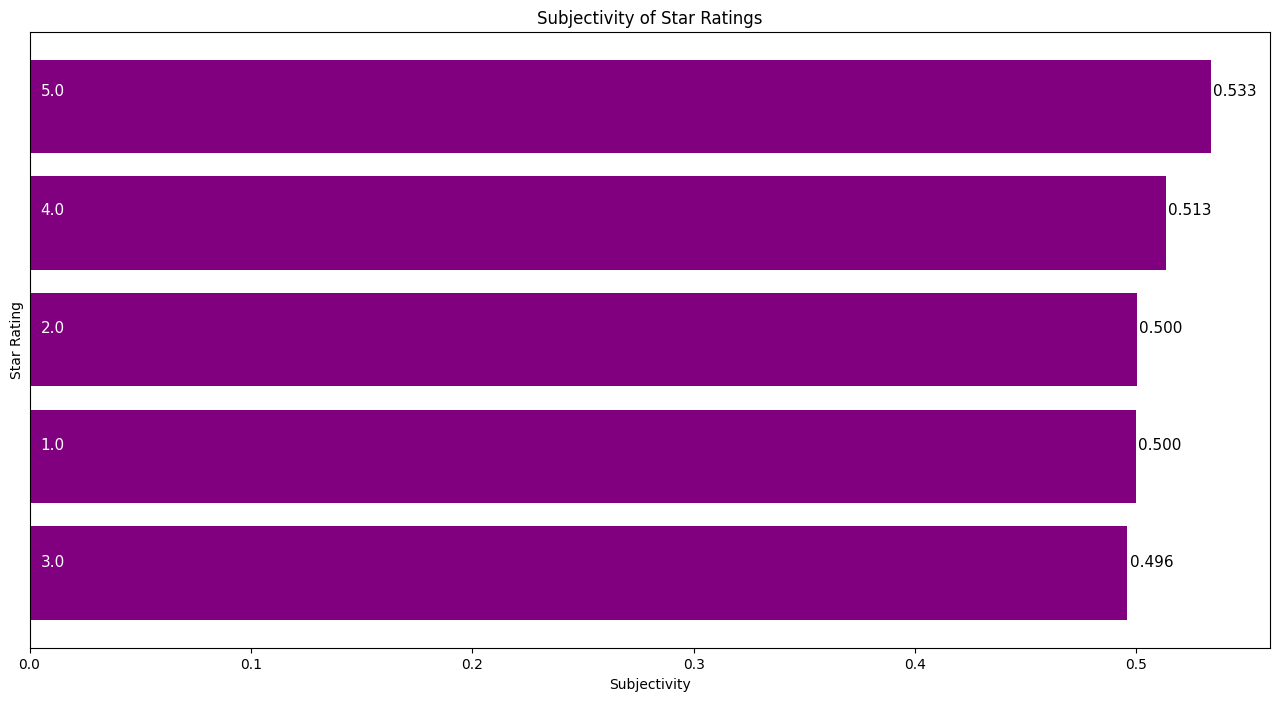

In [ ]:
star_rating_subjectivity_sorted=pd.DataFrame(df.groupby('star_rating')['subjectivity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Subjectivity')
plt.ylabel('Star Rating')
plt.title('Subjectivity of Star Ratings')
polarity_graph=plt.barh(np.arange(len(star_rating_subjectivity_sorted.index)),star_rating_subjectivity_sorted['subjectivity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,star_rating_subjectivity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,star_rating_subjectivity_sorted['subjectivity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()

## Vader

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# List of example texts to analyze
texts = df.review_text[0:10].tolist()

# Loop through the texts and get the sentiment scores for each one
for text in texts:
    scores = analyzer.polarity_scores(text)
    print(text)
    print(scores)

Not quite The Cruel Prince but I enjoyed this a lot.I loved being back in this world. I loved the writing, the familial angst/trauma, the riddles and twists and turns (though I guessed some). I enjoyed Wren as a narrator, though not as much as Jude, but I doubt I will ever come to see Oak as sexy. He's stuck as a little boy in my mind. Also-- hairy feet and hooves? Not my jam  face_with_tears_of_joy Also, the ending was exciting. I await the sequel.
{'neg': 0.056, 'neu': 0.631, 'pos': 0.313, 'compound': 0.9826}
hmm. i didnt obsess over this one like i did with the original trilogy.while i did enjoy the characters and the writing, i actually was a little bored of the storyline at times. HOWEVER, the plot takes a VERY compelling turn towards the end that has me highly interested in how the story/series will progress. so i guess thats something!overall, i do think this is a good expansion to the world of elfhame. so heres hoping the story is a little more exciting in the next installment 

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)

    if scores["pos"] > scores["neg"]:
        return 1

    return 0

df["vader_result"] = df["review_text"].apply(lambda x: analyzer.polarity_scores(x))
#valid_set["vader_result"] = valid_set["review"].apply(lambda x: vader_sentiment_result(x))

In [ ]:
normalized_vader = pd.json_normalize(df["vader_result"])
df = pd.concat([df, normalized_vader], axis = 1)

In [ ]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text,polarity,subjectivity,vader_result,neg,neu,pos,compound
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo...",0.221250,0.650000,"{'neg': 0.056, 'neu': 0.631, 'pos': 0.313, 'co...",0.056,0.631,0.313,0.9826
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e...",0.156923,0.579231,"{'neg': 0.017, 'neu': 0.716, 'pos': 0.267, 'co...",0.017,0.716,0.267,0.9754
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do...",0.196094,0.587500,"{'neg': 0.16, 'neu': 0.583, 'pos': 0.257, 'com...",0.160,0.583,0.257,0.8526
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar",-0.071429,0.214286,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba...",0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


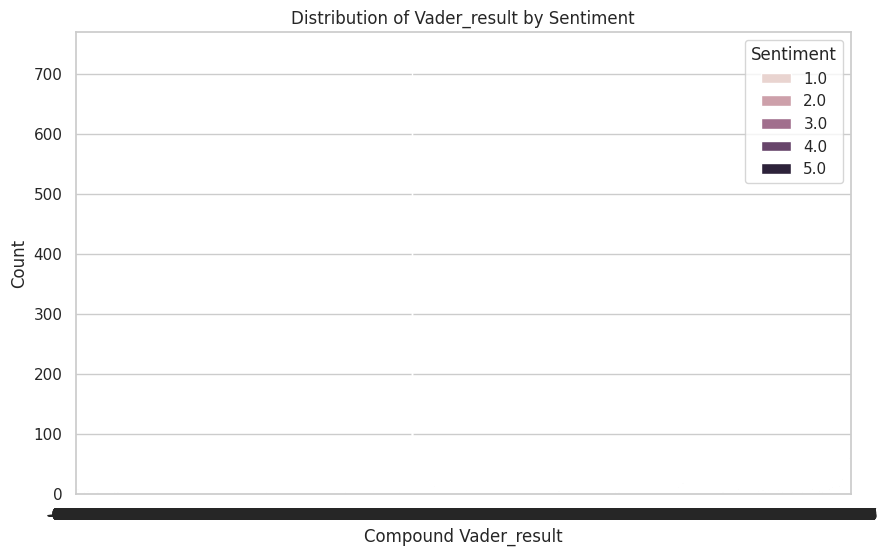

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing columns 'sentiment' and 'Vader_result'

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='compound', hue='star_rating')
plt.title('Distribution of Vader_result by Sentiment')
plt.xlabel('Compound Vader_result')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
low_rating = df[df['star_rating']<=2.0]

In [ ]:
# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# List of example texts to analyze
texts = low_rating.review_text[0:10].tolist()

# Loop through the texts and get the sentiment scores for each one
for text in texts:
    scores = analyzer.polarity_scores(text)
    print(text)
    print(scores)

2.5 stars star  biggest plot twist of 2023 so far is me giving a Holly Black book two stars. this is one of those books that is so boring and shallow that it drains your energy so that even being a hater feels like too much effort. usually, books i give this type of rating to end up being the recipient of my all-consuming loathing it stirred within me. but this was so bland that i can’t even really detail every which way this flopped.we all know Holly Black knows how to write tension and chemistry like no other. we have seen it, adored it, revelled in it, lost our damn minds reading it. so you’d think she’s be able to write a new set of characters who have tension and chemistry, right? right????it was genuinely painful, at times, to read the sheer lack of chemistry between Oak and Wren. it is truly astronomical how unromantic they are as a pairing. Holly Black puts very little effort into convincing us that we should be rooting for the pair— we get like two flashbacks to when they were